# Task 1: Linear Regression – House Price Prediction (Kaggle Dataset)

This notebook implements a complete Machine Learning workflow using the **Kaggle California Housing CSV dataset**.

### Workflow
- Load CSV data
- Exploratory Data Analysis (EDA)
- Data cleaning (missing values)
- Train-test split
- Linear Regression model training
- Model evaluation (MAE, RMSE, R²)


In [18]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # for saving the model

# Load California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame  # DataFrame version
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

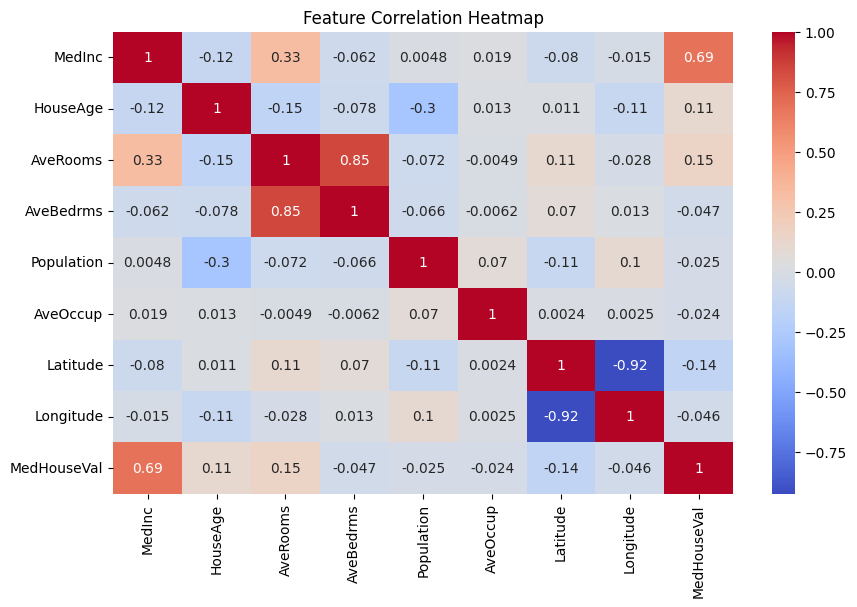

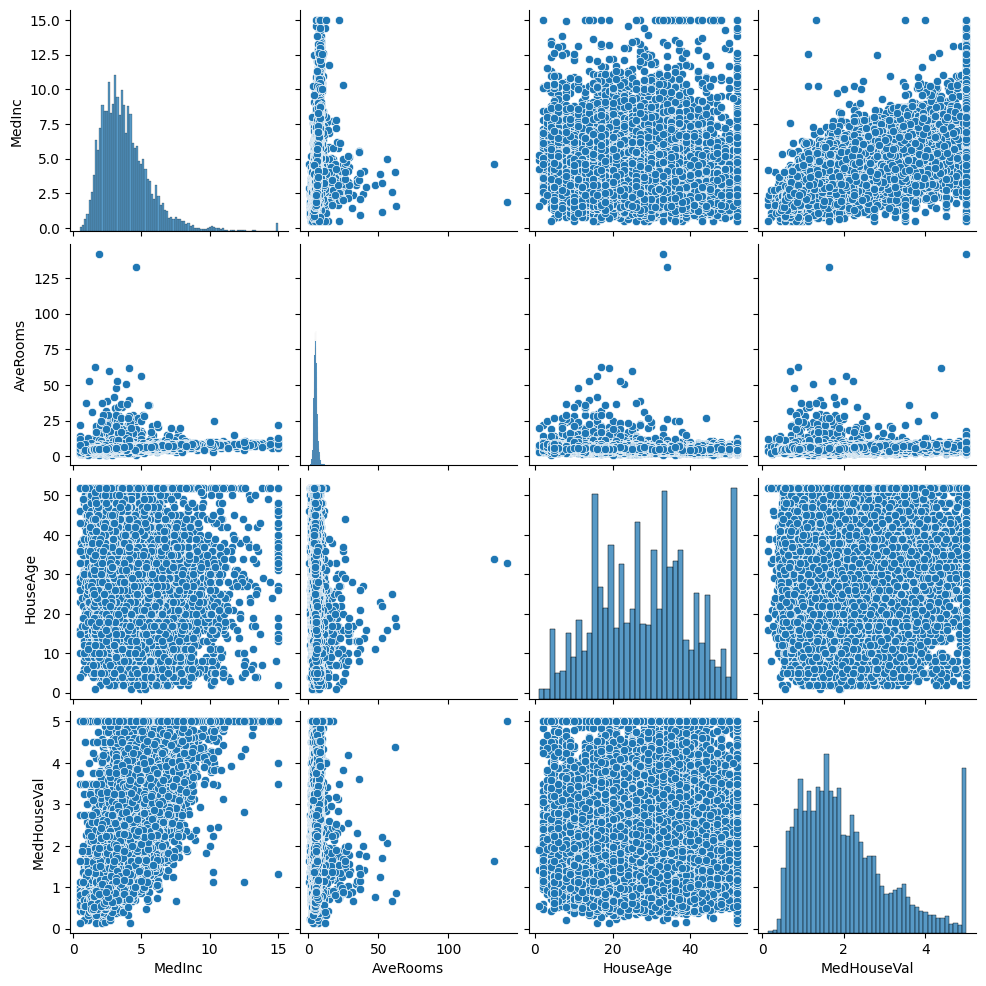

In [19]:
# Quick overview
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot of selected features (optional for small subset)
sns.pairplot(df[['MedInc', 'AveRooms', 'HouseAge', 'MedHouseVal']])
plt.show()


In [20]:
# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Initialize Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


MAE: 0.53
RMSE: 0.75
R² Score: 0.576


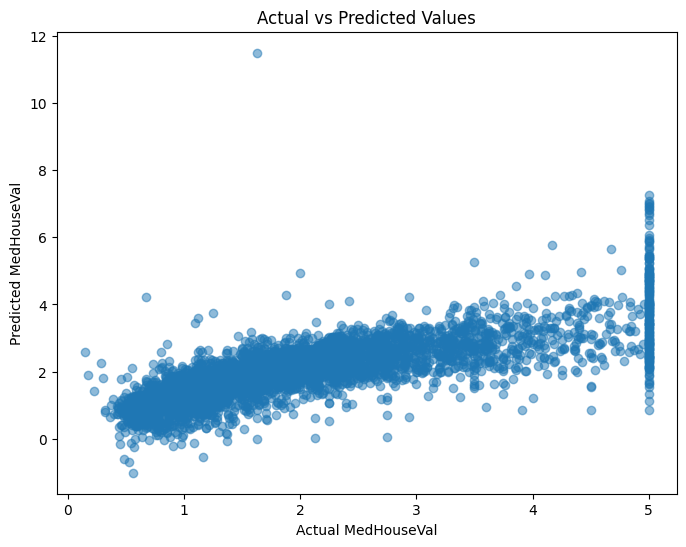

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted Values")
plt.show()


In [24]:
joblib.dump(model, "linear_regression_california.pkl")
joblib.dump(scaler, "scaler_california.pkl")



['scaler_california.pkl']

## Future Improvements

Although the current Linear Regression model provides a reasonable baseline for house price prediction, several improvements can be explored to enhance performance and robustness:

- Feature Engineering: Create new features or apply transformations (e.g., log transformation, interaction terms) to better capture relationships in the data.
- Polynomial Regression: Introduce polynomial features to model non-linear patterns in house prices.
- Regularization Techniques: Apply Ridge or Lasso regression to reduce overfitting and handle multicollinearity.
- Outlier Handling: Detect and remove or cap extreme values that may negatively affect model performance.
- Model Comparison: Experiment with advanced models such as Decision Trees, Random Forests, or Gradient Boosting and compare their performance with Linear Regression.

These steps can help improve prediction accuracy and provide deeper insights into the factors affecting house prices.
